# This notebook shows the model bias of SolTraNet(eos6oli).




Data Preprocessing

In [ ]:

#Installing necessary Libraries and specifying path to relevant folders
!pip install rdkit
!pip install standardiser
# In this codeblock I will import the necessary packages and specify the paths to relevant folders
from rdkit import RDLogger
import logging
from os import path, remove
from rdkit import Chem
from rdkit.Chem import AllChem
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

# Disable warning messages
logging.getLogger("standardiser.standardise").setLevel(logging.ERROR)
RDLogger.DisableLog('rdApp.error')
RDLogger.DisableLog('rdApp.warning')

sys.path.append('../src')
DATAPATH = "../data"
FIGUREPATH = "../figures/"


In [ ]:
%%capture
%env MINICONDA_INSTALLER_SCRIPT=Miniconda3-py37_4.12.0-Linux-x86_64.sh
%env MINICONDA_PREFIX=/usr/local
%env PYTHONPATH= "$PYTHONPATH:/usr/local/lib/python3.7/site-packages"
%env PIP_ROOT_USER_ACTION=ignore

!wget https://repo.anaconda.com/miniconda/$MINICONDA_INSTALLER_SCRIPT
!chmod +x $MINICONDA_INSTALLER_SCRIPT
!./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

!python -m pip install git+https://github.com/ersilia-os/ersilia.git
!python -m pip install requests --upgrade
import sys

_ = sys.path.append("/usr/local/lib/python3.7/site-packages")

# connecting google colab to Google Drive and To Mount google drive

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


# Creating a path for the folder

In [ ]:
# specifying the input folder
input_folder = "/content/drive/MyDrive/Ersilia"    # @param {type:"string"}

In [ ]:
# specifying the output folder

output_folder = "/content/drive/MyDrive/Ersilia"   # @param {type:"string"}

In [ ]:
# This is the csv file containing one thousand molecules

input_filename = "reference_library"  # @param {type:"string"}

In [ ]:
# The name smiles is used because that is the column header name in the reference_library
smiles_column = "smiles"  # @param {type:"string"}

# Evaluation of the Model Bias

In [ ]:
#Download and fetch the model

model_name = "eos6oli"

import time

begin = time.time()
!ersilia fetch $model_name
end = time.time()

print("Time taken:", round((end - begin), 2), "seconds")




⬇️  Fetching model eos6oli: soltrannet-aqueous-solubility
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
  Running command git clone -q https://github.com/ersilia-os/bentoml-ersilia.git /tmp/pip-req-build-y82lq6y_
Solving environment: / failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: / - \ | / - \ | / done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 24.3.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /usr/local/envs/eosbase-bentoml-0.11.0-py37

  added / updated specs:
    - python=3.7


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _openmp_mutex-5.1          |            1_gnu          21 KB
    ca-certificates-2024.3.11  |       h06a430

In [ ]:
# Serving the model

# returns available APIs (calculate or predict)

!ersilia serve $model_name


sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
🚀 Serving model eos6oli: soltrannet-aqueous-solubility

   URL: http://127.0.0.1:45615
   PID: 8752
   SRV: conda

👉 To run model:
   - run

💁 Information:
   - info


In [ ]:
# specifying the name of my input csv file

input_filename = "eml_canonical"


In [ ]:
# specifying the SMILES column name
smiles_column = "can_smiles"

# Extracting smiles to be in a list format

In [ ]:
import pandas as pd

path = "%s/%s.csv" % (input_folder, input_filename)
smi_col = "%s" % smiles_column
df = pd.read_csv(path)
smiles = df[smi_col].tolist()

print("My dataset contains" + " " + str(len(smiles)) + " " + "SMILES")


My dataset contains 442 SMILES


In [ ]:
#Running predictions
api = "calculate"

from ersilia import ErsiliaModel
import time

model = ErsiliaModel(model_name)
begin = time.time()
output = model.api(input=smiles, output="pandas")
end = time.time()

print("Successful 👍! Time taken:", round((end - begin), 2), "seconds")
model.close()


Successful 👍! Time taken: 35.99 seconds


In [ ]:
# Checking the results

print(output.head())

                           key  \
0  MCGSCOLBFJQGHM-SCZZXKLOSA-N   
1  GZOSMCIZMLWJML-VJLLXTKPSA-N   
2  BZKPWHYZMXOIDC-UHFFFAOYSA-N   
3  QTBSBXVTEAMEQO-UHFFFAOYSA-N   
4  PWKSKIMOESPYIA-BYPYZUCNSA-N   

                                               input  solubility  
0      Nc1nc(NC2CC2)c2ncn([C@H]3C=C[C@@H](CO)C3)c2n1      -2.332  
1  C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...      -5.090  
2                         CC(=O)Nc1nnc(S(N)(=O)=O)s1      -1.242  
3                                            CC(=O)O       1.229  
4                            CC(=O)N[C@@H](CS)C(=O)O      -0.308  


In [ ]:
#Saving the results in Google Drive

output_path = "%s/%s_output.csv" % (output_folder, model_name)
output.to_csv(output_path, index=False)

In [ ]:

eos6oli=pd.read_csv("/content/drive/MyDrive/Ersilia/eos6oli_output.csv")
eos6oli.head()


,key,input,solubility
0,MCGSCOLBFJQGHM-SCZZXKLOSA-N,Nc1nc(NC2CC2)c2ncn([C@H]3C=C[C@@H](CO)C3)c2n1,-2.332
1,GZOSMCIZMLWJML-VJLLXTKPSA-N,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,-5.090
2,BZKPWHYZMXOIDC-UHFFFAOYSA-N,CC(=O)Nc1nnc(S(N)(=O)=O)s1,-1.242
3,QTBSBXVTEAMEQO-UHFFFAOYSA-N,CC(=O)O,1.229
4,PWKSKIMOESPYIA-BYPYZUCNSA-N,CC(=O)N[C@@H](CS)C(=O)O,-0.308


In [ ]:
#Converting the output into a pandas dataframe
output = pd.DataFrame(output, columns=['key', 'input', 'solubility'])


Text(0.5, 1.0, 'Distribution of Predicted Values')

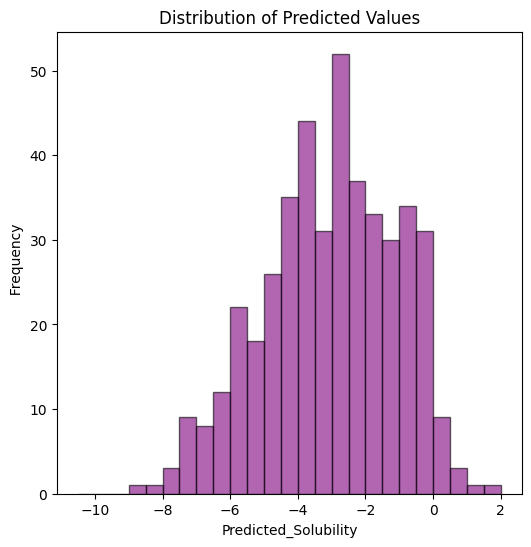

In [ ]:
# Plots to observe the distribution of predicted values
import matplotlib.pyplot as plt
bins=list(np.arange(-10.5,2.5,.5))

plt.figure(figsize=(6, 6))
plt.hist(output['solubility'], bins=bins, color='purple', edgecolor='black', alpha=0.6)
plt.ylabel('  Frequency')
plt.xlabel('Predicted_Solubility')
plt.title('Distribution of Predicted Values')




The graphical representation showcases the distribution of solubility values across the dataset, offering valuable insights into the prevalence of various solubility levels. Notably, the plot reveals a concentration of solubility values around -5, suggesting that a significant portion of the compounds in the dataset share this particular solubility characteristic.

Drawing from this observation, one could infer that the dataset predominantly consists of compounds with solubility levels clustered near -5. Further analysis could explore the implications of this concentration, such as the potential impact on drug development, formulation strategies, or environmental considerations related to these solubility patterns.








In [ ]:
from rdkit import Chem
from rdkit.Chem import DataStructs, AllChem
import numpy as np
from sklearn.decomposition import PCA


# Morgan Fingerprint funtion
def generate_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    finger_prints = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)
    array = np.zeros((1,), dtype=np.int8)
    Chem.DataStructs.ConvertToNumpyArray(finger_prints, array)
    return array

# Threshold set for hERG inhibitors
hERG_blockers_threshold = 0.5

output['Fingerprint'] = output['input'].apply(generate_fingerprint)

fingerprints = np.vstack(output['Fingerprint'])
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(fingerprints)

output.head()


,key,input,solubility,Fingerprint
0,MCGSCOLBFJQGHM-SCZZXKLOSA-N,Nc1nc(NC2CC2)c2ncn([C@H]3C=C[C@@H](CO)C3)c2n1,-2.332,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
1,GZOSMCIZMLWJML-VJLLXTKPSA-N,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,-5.090,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
2,BZKPWHYZMXOIDC-UHFFFAOYSA-N,CC(=O)Nc1nnc(S(N)(=O)=O)s1,-1.242,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,QTBSBXVTEAMEQO-UHFFFAOYSA-N,CC(=O)O,1.229,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,PWKSKIMOESPYIA-BYPYZUCNSA-N,CC(=O)N[C@@H](CS)C(=O)O,-0.308,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot
top_10_predictions = output.sort_values(by='solubility', ascending=True).head(11)
color_palette = sns.color_palette("coolwarm", len(top_10_predictions))
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.barplot(x='solubility', y='input', hue='input', data=top_10_predictions, palette=color_palette, dodge=False)
plt.xlabel('Predicted Solubility', fontsize=14)
plt.ylabel('SMILES', fontsize=14)
plt.title('Top 10 Molecules with Highest Predicted Probabilities', fontsize=16)
plt.grid(True, axis='x')
plt.show()




In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np
from sklearn.decomposition import PCA

# Define Morgan Fingerprint function
def generate_fingerprint(smiles):
    # Convert SMILES to RDKit Mol object
    mol = Chem.MolFromSmiles(smiles)
    # Generate Morgan fingerprint with specified parameters
    finger_prints = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)
    # Convert fingerprint to numpy array
    array = np.zeros((1,), dtype=np.int8)
    Chem.DataStructs.ConvertToNumpyArray(finger_prints, array)
    return array

# Threshold for hERG inhibitors
hERG_blockers_threshold = 0.5

# Apply fingerprint generation function to each SMILES in 'input' column
output['Fingerprint'] = output['input'].apply(generate_fingerprint)

# Stack all fingerprints into a numpy array
fingerprints = np.vstack(output['Fingerprint'])

# Perform PCA with 2 components
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(fingerprints)

# Display the first few rows of the output dataframe
output.head()


,key,input,solubility,Fingerprint
0,MCGSCOLBFJQGHM-SCZZXKLOSA-N,Nc1nc(NC2CC2)c2ncn([C@H]3C=C[C@@H](CO)C3)c2n1,-2.332,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
1,GZOSMCIZMLWJML-VJLLXTKPSA-N,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,-5.090,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
2,BZKPWHYZMXOIDC-UHFFFAOYSA-N,CC(=O)Nc1nnc(S(N)(=O)=O)s1,-1.242,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,QTBSBXVTEAMEQO-UHFFFAOYSA-N,CC(=O)O,1.229,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,PWKSKIMOESPYIA-BYPYZUCNSA-N,CC(=O)N[C@@H](CS)C(=O)O,-0.308,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


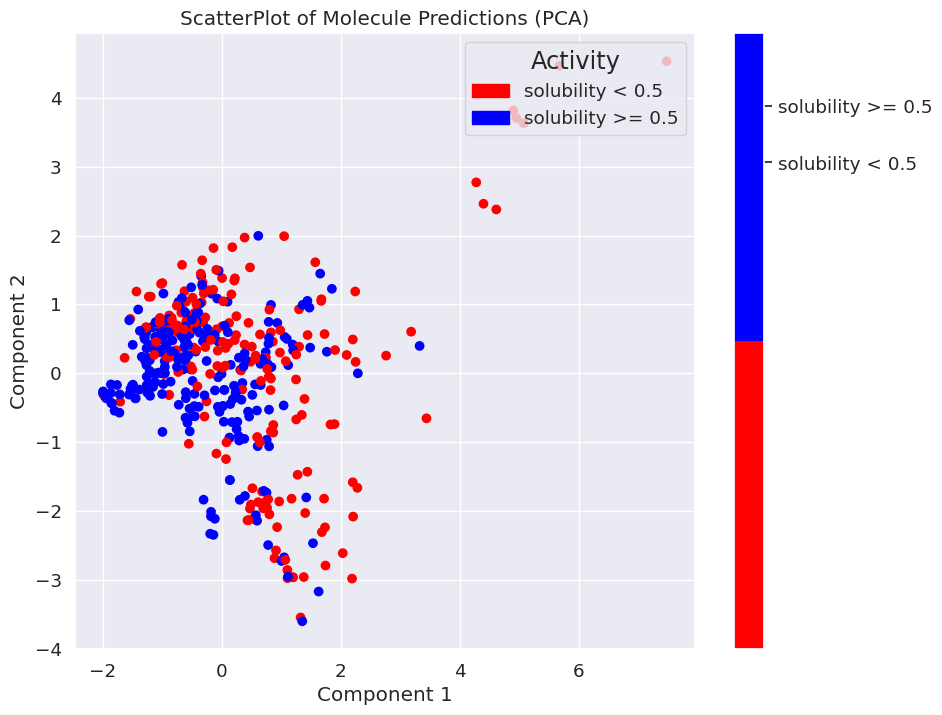

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Plot scatterplot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=output['solubility'], cmap=mcolors.ListedColormap(legend_colors))
plt.title('ScatterPlot of Molecule Predictions (PCA)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

legend_labels = ['solubility < 0.5', 'solubility >= 0.5']
legend_colors = ['red', 'blue']
legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(legend_colors, legend_labels)]
plt.legend(handles=legend_patches, loc='upper right', title='Activity', title_fontsize='large')

# Set colorbar ticks and labels
cbar = plt.colorbar(scatter)
cbar.set_ticks([0, 1])
cbar.set_ticklabels(legend_labels)
plt.show()


The scatterplot visually represents the spatial arrangement of molecules in a two-dimensional space, achieved through dimensionality reduction. The proximity of data points suggests similarities in molecular properties, particularly in terms of their fingerprints, which could imply shared characteristics in solubility.

The color palette utilized in the plot serves a crucial role in segmenting regions based on prediction probabilities. Specifically, regions depicted in red correspond to probabilities below 0.5, indicating a tendency towards lower solubility levels. Conversely, areas shaded in blue represent probabilities at or above 0.5, reflecting higher solubility levels. This color-based distinction highlights a notable prevalence of molecules with lower solubility characteristics within the dataset.

This insight derived from the plot could inform further investigations into the underlying factors influencing solubility patterns within the molecular dataset. Such analyses could be instrumental in refining strategies for drug development, formulation optimization, or environmental impact assessments related to solubility profiles.













